# Crop Recommendation based on its dependent parameters

In [1]:
# Importing libraries
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
# csv file reporting all factors needed to grow a particular crop
df = pd.read_csv('Crop_recommendation.csv')

In [3]:
# head of that csv file with some data
df.head()

,N,P,K,temperature,humidity,ph level,rainfall,label
0,100.0,70.0,160.0,21.00,60.0,6.345,202.935536,Tomato
1,556.0,278.0,905.0,29.00,67.0,6.209,226.655537,Tomato
2,30.0,29.0,19.0,17.98,81.0,6.267,263.964248,Tomato
3,174.0,227.0,143.0,20.00,77.0,6.234,242.864034,Tomato
4,417.0,3333.0,833.0,23.00,72.0,6.454,262.717340,Tomato


In [4]:
# tail of that csv file with some data
df.tail()

,N,P,K,temperature,humidity,ph level,rainfall,label
153,0.8,0.64,0.91,19.103428,87.430,5.897,75.491012,Potato
154,3333.0,2000.00,3750.00,17.485041,84.987,6.234,86.050780,Potato
155,519.0,698.00,1001.00,19.407517,65.004,5.200,80.250646,Potato
156,667.0,250.00,6000.00,20.186494,65.001,6.456,78.260396,Potato
157,113.0,59.00,163.00,17.302879,66.765,5.098,75.577904,Potato


In [5]:
df.size

1264

In [6]:
df.shape

(158, 8)

In [7]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph level', 'rainfall',
       'label'],
      dtype='object')

In [8]:
df['label'].unique()

array(['Tomato', 'Pepper Bell', 'Potato'], dtype=object)

In [9]:
df.dtypes

N              float64
P              float64
K              float64
temperature    float64
humidity       float64
ph level       float64
rainfall       float64
label           object
dtype: object

In [10]:
df['label'].value_counts()

Pepper Bell    53
Potato         53
Tomato         52
Name: label, dtype: int64

In [11]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph level', 'rainfall']]
target = df['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

In [12]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [13]:
# Splitting into train and test data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree Classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  100.0
              precision    recall  f1-score   support

 Pepper Bell       1.00      1.00      1.00         7
      Potato       1.00      1.00      1.00        11
      Tomato       1.00      1.00      1.00        14

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



In [15]:
from sklearn.model_selection import cross_val_score

In [16]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [17]:
score

array([1., 1., 1., 1., 1.])

In [18]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Gaussian Naive Bayes Classifier

In [19]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  1.0
              precision    recall  f1-score   support

 Pepper Bell       1.00      1.00      1.00         7
      Potato       1.00      1.00      1.00        11
      Tomato       1.00      1.00      1.00        14

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



In [20]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([1.     , 1.     , 0.96875, 1.     , 1.     ])

In [21]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Classifier

In [22]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.96875
              precision    recall  f1-score   support

 Pepper Bell       1.00      1.00      1.00         7
      Potato       0.92      1.00      0.96        11
      Tomato       1.00      0.93      0.96        14

    accuracy                           0.97        32
   macro avg       0.97      0.98      0.97        32
weighted avg       0.97      0.97      0.97        32



In [23]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.4375    , 0.46875   , 0.5625    , 0.58064516, 0.51612903])

In [24]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = 'SVMClassifier.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

# Logistic Regression Classifier

In [25]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.84375
              precision    recall  f1-score   support

 Pepper Bell       0.60      0.86      0.71         7
      Potato       0.88      0.64      0.74        11
      Tomato       1.00      1.00      1.00        14

    accuracy                           0.84        32
   macro avg       0.83      0.83      0.81        32
weighted avg       0.87      0.84      0.85        32



In [26]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.84375   , 0.78125   , 0.75      , 0.64516129, 0.74193548])

In [27]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  1.0
              precision    recall  f1-score   support

 Pepper Bell       1.00      1.00      1.00         7
      Potato       1.00      1.00      1.00        11
      Tomato       1.00      1.00      1.00        14

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



In [29]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([1.        , 1.        , 1.        , 1.        , 0.93548387])

In [30]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

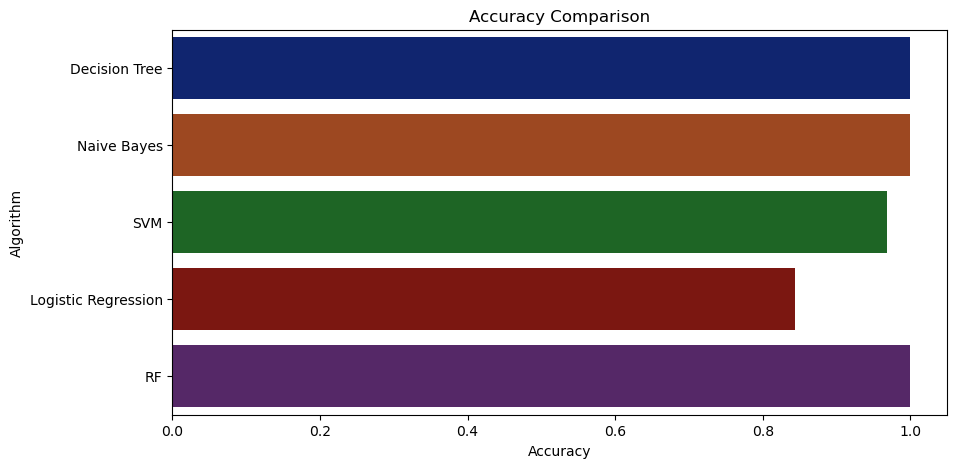

In [31]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [32]:
# input as a set of parameter's values
data = np.array([[417,3333,833,24.907,85.667,6.209,290.6793783]])
prediction = RF.predict(data)
print(prediction)

['Tomato']
